# Education Prediction Linear Regression Model (FIXED)

This notebook demonstrates the process of building a linear regression model to predict school life expectancy based on government expenditure and other education indicators.

**Dataset:** Education in General.csv

**Target Variable:** School life expectancy (primary to tertiary, male/female)

**Features:** Government expenditure on education, GDP percentages, and other education indicators

#### Purpose
This model can help policymakers understand the relationship between government investment in education and educational outcomes, enabling better resource allocation decisions.

In [5]:
# Importing EDA libraries 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Import ML libraries 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")

In [6]:
# Importing dataset
data = pd.read_csv("Education in General.csv")
print("Dataset loaded successfully!")
print(f"Shape: {data.shape}")

Dataset loaded successfully!
Shape: (756, 13)


## EXPLORING THE DATASET

In [7]:
# Displaying the first 5 rows
data.head()

,ISO_Code,Country,Year,"School life expectancy, primary to tertiary, male (years)","School life expectancy, primary to tertiary, female (years)","Government expenditure on primary education, US$ (millions)","Government expenditure on secondary education, US$ (millions)","Government expenditure on tertiary education, US$ (millions)",Government expenditure on primary education as a percentage of GDP (%),Government expenditure on secondary education as a percentage of GDP (%),Government expenditure on tertiary education as a percentage of GDP (%),Unnamed: 11,Unnamed: 12
0,DZA,Algeria,2010,13.88,14.65,#N/B,#N/B,#N/B,#N/B,#N/B,#N/B,NaN,NaN
1,AGO,Angola,2010,10.42,8.1,#N/B,#N/B,#N/B,2.08,0.53,0.4,NaN,NaN
2,BWA,Botswana,2010,#N/B,#N/B,#N/B,#N/B,#N/B,#N/B,#N/B,#N/B,NaN,NaN
3,BFA,Burkina Faso,2010,7.05,5.97,213.65,63.74,66.71,2.11,0.63,0.66,NaN,NaN
4,CPV,Cabo Verde,2010,11.76,12.95,#N/B,#N/B,#N/B,#N/B,#N/B,#N/B,NaN,NaN


In [8]:
# Displaying the column names
print("Column names:")
for i, col in enumerate(data.columns):
    print(f"{i}: {col}")

Column names:
0: ISO_Code
1: Country
2: Year
3: School life expectancy, primary to tertiary, male (years)
4: School life expectancy, primary to tertiary, female (years)
5: Government expenditure on primary education, US$ (millions)
6: Government expenditure on secondary education, US$ (millions)
7: Government expenditure on tertiary education, US$ (millions)
8: Government expenditure on primary education as a percentage of GDP (%)
9: Government expenditure on secondary education as a percentage of GDP (%)
10: Government expenditure on tertiary education as a percentage of GDP (%)
11: Unnamed: 11
12: Unnamed: 12


In [9]:
# Information about the dataset
print("Dataset Info:")
data.info()
print(f"\nShape: {data.shape}")

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 13 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   ISO_Code                                                                  756 non-null    object 
 1   Country                                                                   756 non-null    object 
 2   Year                                                                      756 non-null    int64  
 3   School life expectancy, primary to tertiary, male (years)                 756 non-null    object 
 4   School life expectancy, primary to tertiary, female (years)               756 non-null    object 
 5   Government expenditure on primary education, US$ (millions)               756 non-null    object 
 6   Government expenditure on secondary education, US$ (

In [10]:
# Describing numerical values 
print("Numerical Data Description:")
data.describe()

Numerical Data Description:


,Year,Unnamed: 11,Unnamed: 12
count,756.000000,0.0,0.0
mean,2016.500000,NaN,NaN
std,4.033798,NaN,NaN
min,2010.000000,NaN,NaN
25%,2013.000000,NaN,NaN
50%,2016.500000,NaN,NaN
75%,2020.000000,NaN,NaN
max,2023.000000,NaN,NaN


In [11]:
# Checking for null values and missing data
print("Missing values per column:")
missing_data = data.isnull().sum()
missing_percentage = (missing_data / len(data)) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing_data,
    'Percentage': missing_percentage
})
print(missing_df[missing_df['Missing Values'] > 0])

Missing values per column:
             Missing Values  Percentage
Unnamed: 11             756       100.0
Unnamed: 12             756       100.0


In [12]:
# Check for '#N/B' values (which represent missing data)
print("Checking for '#N/B' values:")
for col in data.columns:
    nb_count = (data[col] == '#N/B').sum()
    if nb_count > 0:
        print(f"{col}: {nb_count} '#N/B' values")

Checking for '#N/B' values:
School life expectancy, primary to tertiary, male (years): 496 '#N/B' values
School life expectancy, primary to tertiary, female (years): 496 '#N/B' values
Government expenditure on primary education, US$ (millions): 504 '#N/B' values
Government expenditure on secondary education, US$ (millions): 500 '#N/B' values
Government expenditure on tertiary education, US$ (millions): 509 '#N/B' values
Government expenditure on primary education as a percentage of GDP (%): 450 '#N/B' values
Government expenditure on secondary education as a percentage of GDP (%): 443 '#N/B' values
Government expenditure on tertiary education as a percentage of GDP (%): 448 '#N/B' values


In [13]:
# Check unique values in categorical columns
print("Unique countries:", data['Country'].nunique())
print("\nYear range:", data['Year'].min(), "to", data['Year'].max())
print("\nSample countries:")
print(data['Country'].unique()[:10])

Unique countries: 54

Year range: 2010 to 2023

Sample countries:
['Algeria' 'Angola' 'Botswana' 'Burkina Faso' 'Cabo Verde' 'Cameroon'
 'Burundi' 'Central African Republic' 'Chad' 'Comoros']


## DATA PREPROCESSING

In [14]:
# Replace '#N/B' with NaN
data = data.replace('#N/B', np.nan)

# Convert numerical columns to float
numerical_columns = [
    'School life expectancy, primary to tertiary, male (years)',
    'School life expectancy, primary to tertiary, female (years)',
    'Government expenditure on primary education, US$ (millions)',
    'Government expenditure on secondary education, US$ (millions)',
    'Government expenditure on tertiary education, US$ (millions)',
    'Government expenditure on primary education as a percentage of GDP (%)',
    'Government expenditure on secondary education as a percentage of GDP (%)',
    'Government expenditure on tertiary education as a percentage of GDP (%)'
]

for col in numerical_columns:
    if col in data.columns:
        data[col] = pd.to_numeric(data[col], errors='coerce')

print("Data preprocessing completed!")

Data preprocessing completed!


In [15]:
# Create a clean dataset for modeling
# We'll focus on predicting male school life expectancy
target_col = 'School life expectancy, primary to tertiary, male (years)'

# Select features for modeling
feature_columns = [
    'Government expenditure on primary education, US$ (millions)',
    'Government expenditure on secondary education, US$ (millions)',
    'Government expenditure on tertiary education, US$ (millions)',
    'Government expenditure on primary education as a percentage of GDP (%)',
    'Government expenditure on secondary education as a percentage of GDP (%)',
    'Government expenditure on tertiary education as a percentage of GDP (%)',
    'Year'
]

# Create modeling dataset
model_data = data[[target_col] + feature_columns].copy()

# Remove rows with missing target values
model_data = model_data.dropna(subset=[target_col])

print(f"Clean dataset shape: {model_data.shape}")
print(f"Available data points: {len(model_data)}")

Clean dataset shape: (260, 8)
Available data points: 260


In [16]:
# Check correlation with target variable
correlations = model_data.corr()[target_col].sort_values(ascending=False)
print("Correlations with School Life Expectancy (Male):")
print(correlations)

Correlations with School Life Expectancy (Male):
School life expectancy, primary to tertiary, male (years)                   1.000000
Government expenditure on secondary education as a percentage of GDP (%)    0.445693
Government expenditure on secondary education, US$ (millions)               0.336999
Government expenditure on tertiary education, US$ (millions)                0.332574
Government expenditure on primary education, US$ (millions)                 0.316021
Year                                                                        0.194465
Government expenditure on primary education as a percentage of GDP (%)     -0.018507
Government expenditure on tertiary education as a percentage of GDP (%)    -0.171680
Name: School life expectancy, primary to tertiary, male (years), dtype: float64


## VISUALIZATIONS

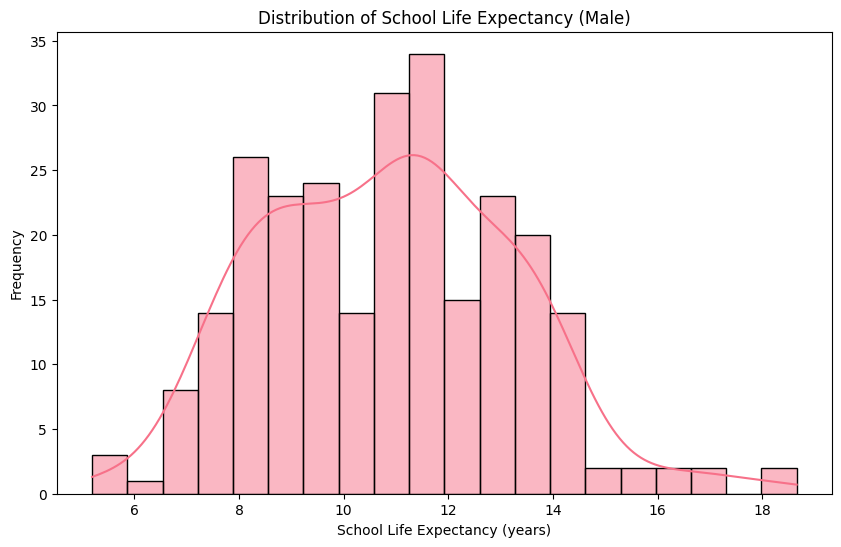

Mean: 10.86 years
Median: 10.91 years
Std: 2.39 years


In [17]:
# Plot target distribution
plt.figure(figsize=(10, 6))
sns.histplot(model_data[target_col], kde=True, bins=20)
plt.title('Distribution of School Life Expectancy (Male)')
plt.xlabel('School Life Expectancy (years)')
plt.ylabel('Frequency')
plt.show()

print(f"Mean: {model_data[target_col].mean():.2f} years")
print(f"Median: {model_data[target_col].median():.2f} years")
print(f"Std: {model_data[target_col].std():.2f} years")

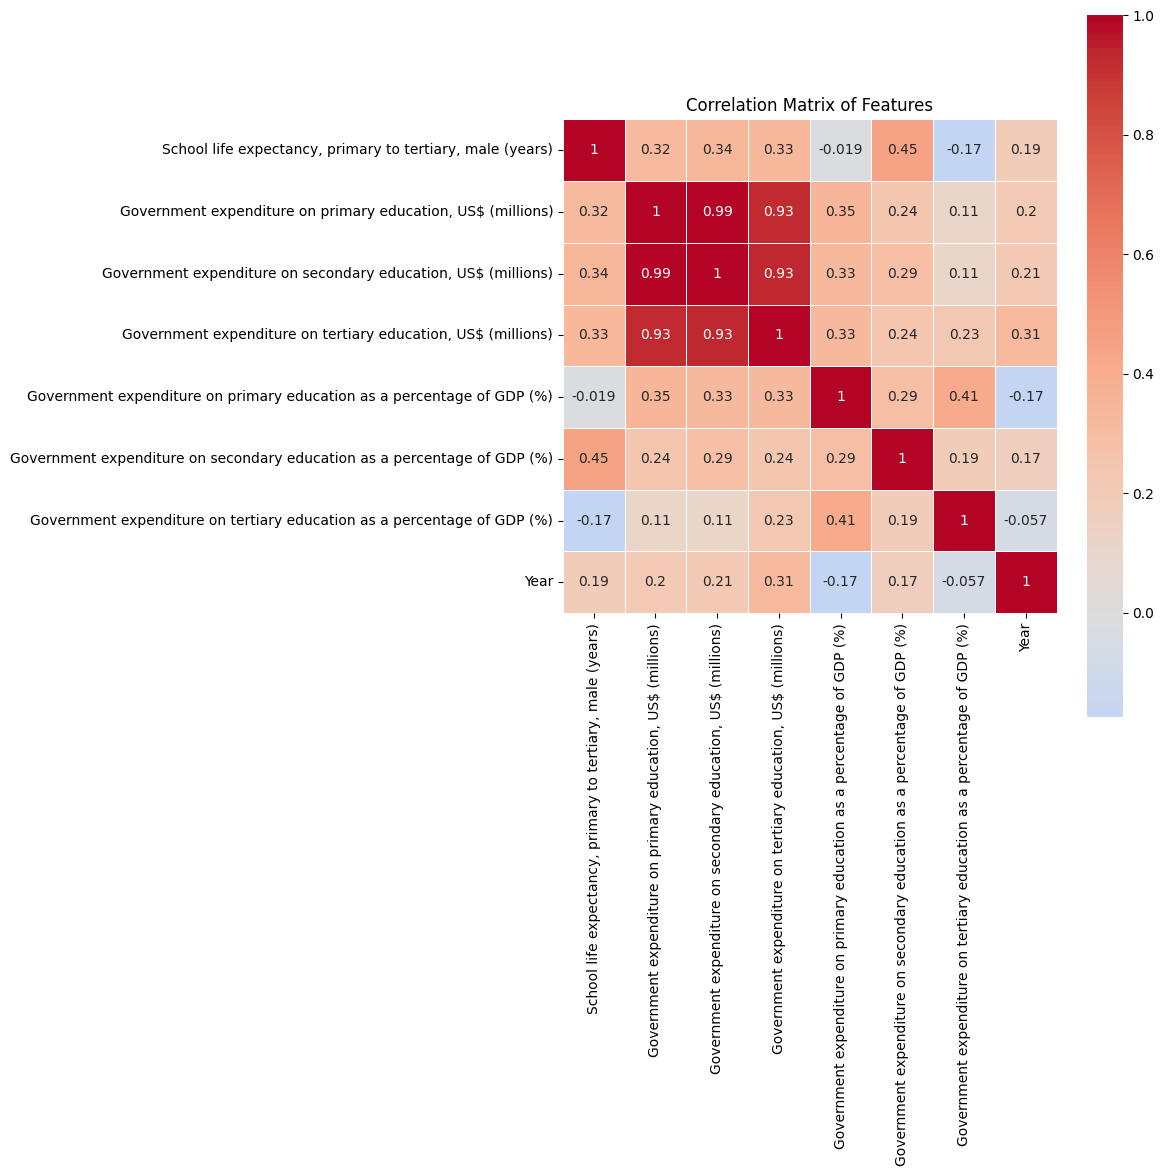

In [18]:
# Correlation heatmap
plt.figure(figsize=(12, 12))
correlation_matrix = model_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.tight_layout()
plt.show()

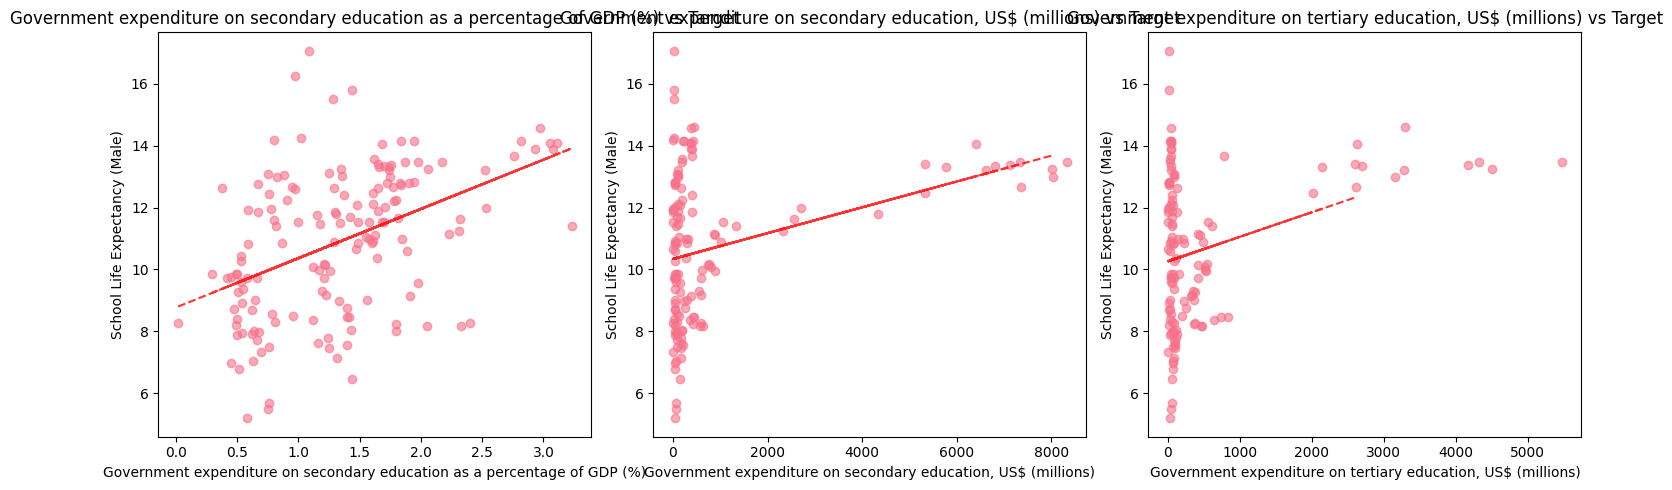

In [19]:
# Scatter plots of top features vs target (FIXED VERSION)
top_features = correlations[1:4].index  # Top 3 features excluding target

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, feature in enumerate(top_features):
    axes[i].scatter(model_data[feature], model_data[target_col], alpha=0.6)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('School Life Expectancy (Male)')
    axes[i].set_title(f'{feature} vs Target')
    
    # Add trend line - ensure both arrays have same length
    valid_mask = ~(model_data[feature].isna() | model_data[target_col].isna())
    if valid_mask.sum() > 0:  # Only plot trend line if we have valid data
        x_valid = model_data[feature][valid_mask]
        y_valid = model_data[target_col][valid_mask]
        z = np.polyfit(x_valid, y_valid, 1)
        p = np.poly1d(z)
        axes[i].plot(model_data[feature], p(model_data[feature]), "r--", alpha=0.8)

plt.tight_layout()
plt.show()

## FEATURE ENGINEERING AND DATA PREPARATION

In [20]:
# Handle missing values in features
print("Missing values before imputation:")
print(model_data[feature_columns].isnull().sum())

# Use median imputation for missing values
imputer = SimpleImputer(strategy='median')
model_data[feature_columns] = imputer.fit_transform(model_data[feature_columns])

print("\nMissing values after imputation:")
print(model_data[feature_columns].isnull().sum())

Missing values before imputation:
Government expenditure on primary education, US$ (millions)                 125
Government expenditure on secondary education, US$ (millions)               123
Government expenditure on tertiary education, US$ (millions)                131
Government expenditure on primary education as a percentage of GDP (%)      109
Government expenditure on secondary education as a percentage of GDP (%)    104
Government expenditure on tertiary education as a percentage of GDP (%)     112
Year                                                                          0
dtype: int64

Missing values after imputation:
Government expenditure on primary education, US$ (millions)                 0
Government expenditure on secondary education, US$ (millions)               0
Government expenditure on tertiary education, US$ (millions)                0
Government expenditure on primary education as a percentage of GDP (%)      0
Government expenditure on secondary education a

In [21]:
# Create additional features
# Total government expenditure on education
model_data['Total_education_expenditure'] = (
    model_data['Government expenditure on primary education, US$ (millions)'] +
    model_data['Government expenditure on secondary education, US$ (millions)'] +
    model_data['Government expenditure on tertiary education, US$ (millions)']
)

# Total education expenditure as percentage of GDP
model_data['Total_education_GDP_percentage'] = (
    model_data['Government expenditure on primary education as a percentage of GDP (%)'] +
    model_data['Government expenditure on secondary education as a percentage of GDP (%)'] +
    model_data['Government expenditure on tertiary education as a percentage of GDP (%)']
)

# Education expenditure ratio (tertiary to primary)
model_data['Tertiary_primary_ratio'] = (
    model_data['Government expenditure on tertiary education, US$ (millions)'] /
    (model_data['Government expenditure on primary education, US$ (millions)'] + 1)  # Add 1 to avoid division by zero
)

print("Additional features created!")
print(f"New dataset shape: {model_data.shape}")

Additional features created!
New dataset shape: (260, 11)


## MODEL PREPARATION

In [22]:
# Prepare features and target
X = model_data.drop(columns=[target_col])
y = model_data[target_col]

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeature names:")
for i, col in enumerate(X.columns):
    print(f"{i}: {col}")

Features shape: (260, 10)
Target shape: (260,)

Feature names:
0: Government expenditure on primary education, US$ (millions)
1: Government expenditure on secondary education, US$ (millions)
2: Government expenditure on tertiary education, US$ (millions)
3: Government expenditure on primary education as a percentage of GDP (%)
4: Government expenditure on secondary education as a percentage of GDP (%)
5: Government expenditure on tertiary education as a percentage of GDP (%)
6: Year
7: Total_education_expenditure
8: Total_education_GDP_percentage
9: Tertiary_primary_ratio


In [23]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

Training set: 208 samples
Test set: 52 samples


In [24]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features scaled successfully!")

Features scaled successfully!


## MODEL TRAINING AND EVALUATION

In [25]:
# Linear Regression Model
print("=== LINEAR REGRESSION MODEL ===")
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test_scaled)

# Calculate metrics
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"R² Score: {r2_lr:.4f}")
print(f"RMSE: {rmse_lr:.4f} years")
print(f"MAE: {mae_lr:.4f} years")

# Feature importance
feature_importance_lr = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_
})
feature_importance_lr = feature_importance_lr.sort_values('Coefficient', key=abs, ascending=False)
print("\nTop 5 most important features (Linear Regression):")
print(feature_importance_lr.head())

=== LINEAR REGRESSION MODEL ===
R² Score: 0.1433
RMSE: 2.5777 years
MAE: 1.9618 years

Top 5 most important features (Linear Regression):
                                             Feature  Coefficient
0  Government expenditure on primary education, U...     1.622729
1  Government expenditure on secondary education,...    -1.244813
4  Government expenditure on secondary education ...     0.774920
5  Government expenditure on tertiary education a...    -0.464265
6                                               Year     0.327629


In [26]:
# Decision Tree Model
print("=== DECISION TREE MODEL ===")
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Calculate metrics
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"R² Score: {r2_dt:.4f}")
print(f"RMSE: {rmse_dt:.4f} years")
print(f"MAE: {mae_dt:.4f} years")

# Feature importance
feature_importance_dt = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_model.feature_importances_
})
feature_importance_dt = feature_importance_dt.sort_values('Importance', ascending=False)
print("\nTop 5 most important features (Decision Tree):")
print(feature_importance_dt.head())

=== DECISION TREE MODEL ===
R² Score: 0.1622
RMSE: 2.5491 years
MAE: 1.6013 years

Top 5 most important features (Decision Tree):
                                             Feature  Importance
9                             Tertiary_primary_ratio    0.244804
4  Government expenditure on secondary education ...    0.154755
2  Government expenditure on tertiary education, ...    0.152142
6                                               Year    0.116416
1  Government expenditure on secondary education,...    0.097632


In [27]:
# Random Forest Model
print("=== RANDOM FOREST MODEL ===")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Calculate metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"R² Score: {r2_rf:.4f}")
print(f"RMSE: {rmse_rf:.4f} years")
print(f"MAE: {mae_rf:.4f} years")

# Feature importance
feature_importance_rf = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
})
feature_importance_rf = feature_importance_rf.sort_values('Importance', ascending=False)
print("\nTop 5 most important features (Random Forest):")
print(feature_importance_rf.head())

=== RANDOM FOREST MODEL ===
R² Score: 0.1990
RMSE: 2.4924 years
MAE: 1.7373 years

Top 5 most important features (Random Forest):
                                             Feature  Importance
4  Government expenditure on secondary education ...    0.211443
6                                               Year    0.198662
9                             Tertiary_primary_ratio    0.132143
0  Government expenditure on primary education, U...    0.078799
5  Government expenditure on tertiary education a...    0.073730


## MODEL COMPARISON

In [28]:
# Compare all models
models_comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest'],
    'R² Score': [r2_lr, r2_dt, r2_rf],
    'RMSE': [rmse_lr, rmse_dt, rmse_rf],
    'MAE': [mae_lr, mae_dt, mae_rf]
})

print("Model Performance Comparison:")
print(models_comparison.round(4))

# Find the best model
best_model_idx = models_comparison['R² Score'].idxmax()
best_model = models_comparison.loc[best_model_idx, 'Model']
print(f"\nBest model based on R² Score: {best_model}")

Model Performance Comparison:
               Model  R² Score    RMSE     MAE
0  Linear Regression    0.1433  2.5777  1.9618
1      Decision Tree    0.1622  2.5491  1.6013
2      Random Forest    0.1990  2.4924  1.7373

Best model based on R² Score: Random Forest


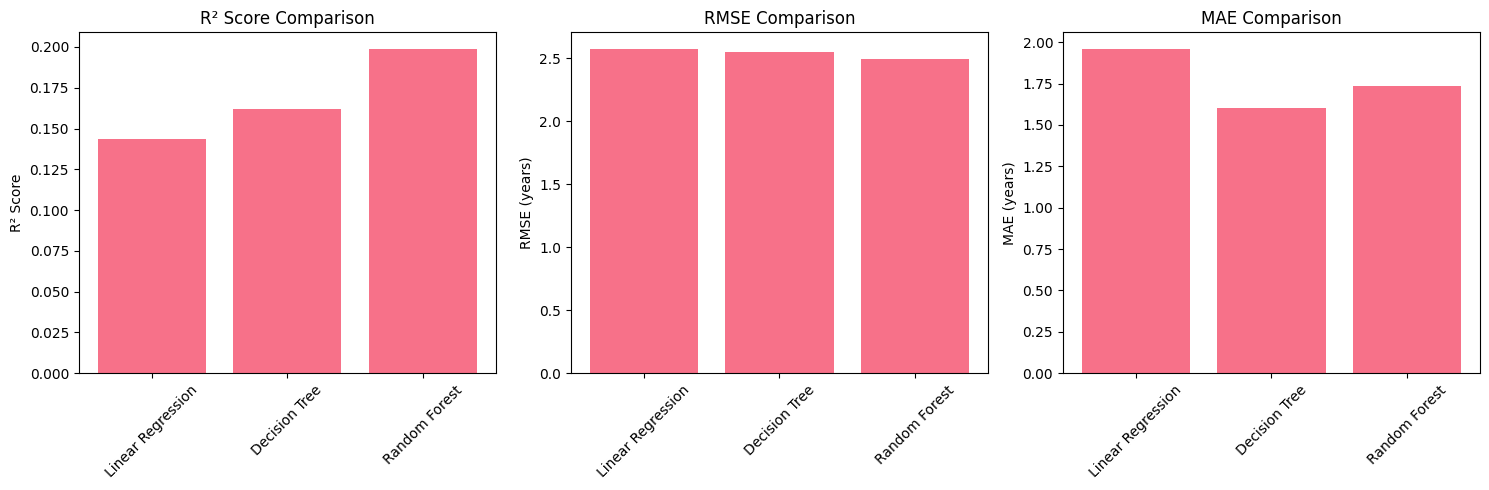

In [29]:
# Visualize model comparison
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# R² Score comparison
axes[0].bar(models_comparison['Model'], models_comparison['R² Score'])
axes[0].set_title('R² Score Comparison')
axes[0].set_ylabel('R² Score')
axes[0].tick_params(axis='x', rotation=45)

# RMSE comparison
axes[1].bar(models_comparison['Model'], models_comparison['RMSE'])
axes[1].set_title('RMSE Comparison')
axes[1].set_ylabel('RMSE (years)')
axes[1].tick_params(axis='x', rotation=45)

# MAE comparison
axes[2].bar(models_comparison['Model'], models_comparison['MAE'])
axes[2].set_title('MAE Comparison')
axes[2].set_ylabel('MAE (years)')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## FEATURE IMPORTANCE ANALYSIS

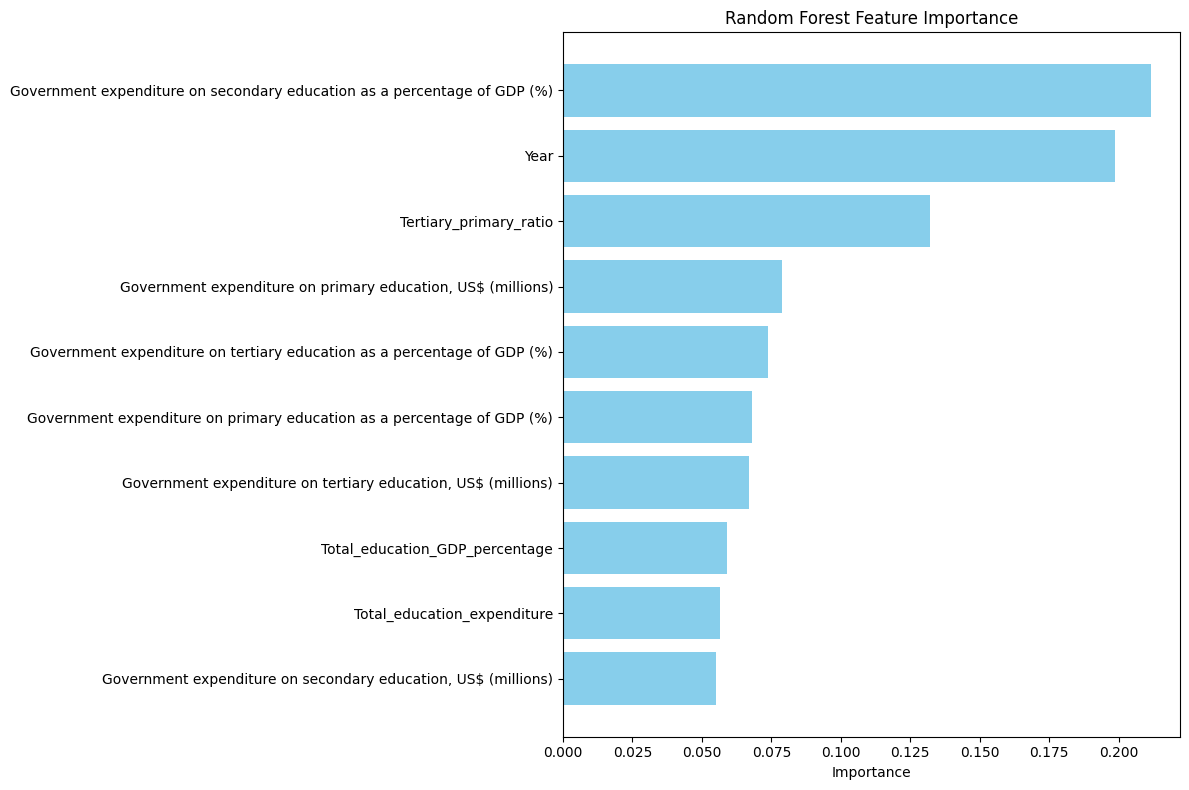

In [30]:
# Plot feature importance for the best model
if best_model == 'Linear Regression':
    importance_df = feature_importance_lr.head(10)
    title = 'Linear Regression Feature Coefficients'
    ylabel = 'Coefficient'
elif best_model == 'Decision Tree':
    importance_df = feature_importance_dt.head(10)
    title = 'Decision Tree Feature Importance'
    ylabel = 'Importance'
else:
    importance_df = feature_importance_rf.head(10)
    title = 'Random Forest Feature Importance'
    ylabel = 'Importance'

plt.figure(figsize=(12, 8))
colors = ['red' if x < 0 else 'blue' for x in importance_df.iloc[:, 1]] if best_model == 'Linear Regression' else 'skyblue'
bars = plt.barh(importance_df.iloc[:, 0], importance_df.iloc[:, 1], color=colors)
plt.xlabel(ylabel)
plt.title(title)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## PREDICTION VISUALIZATION

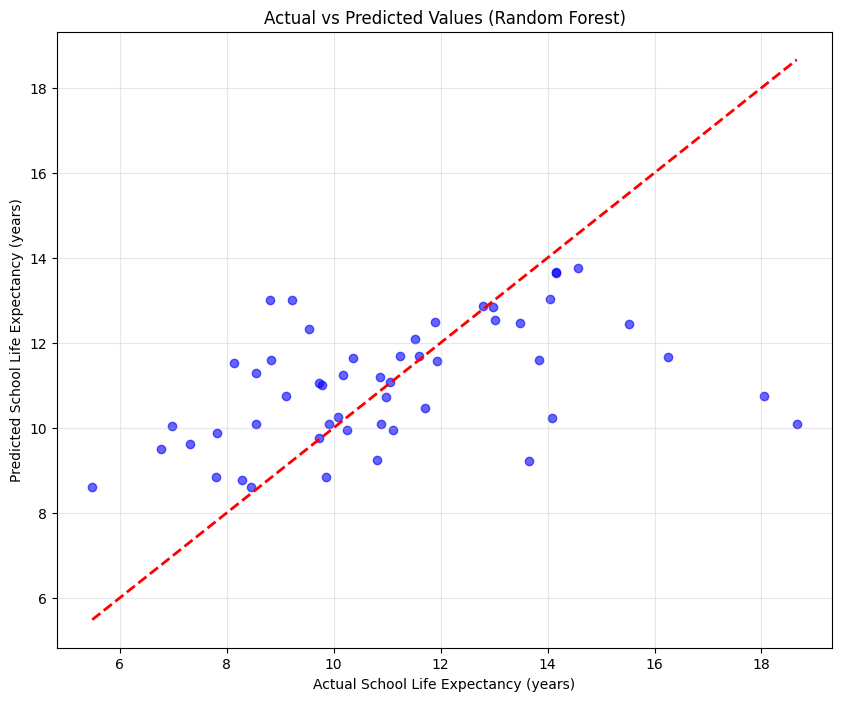

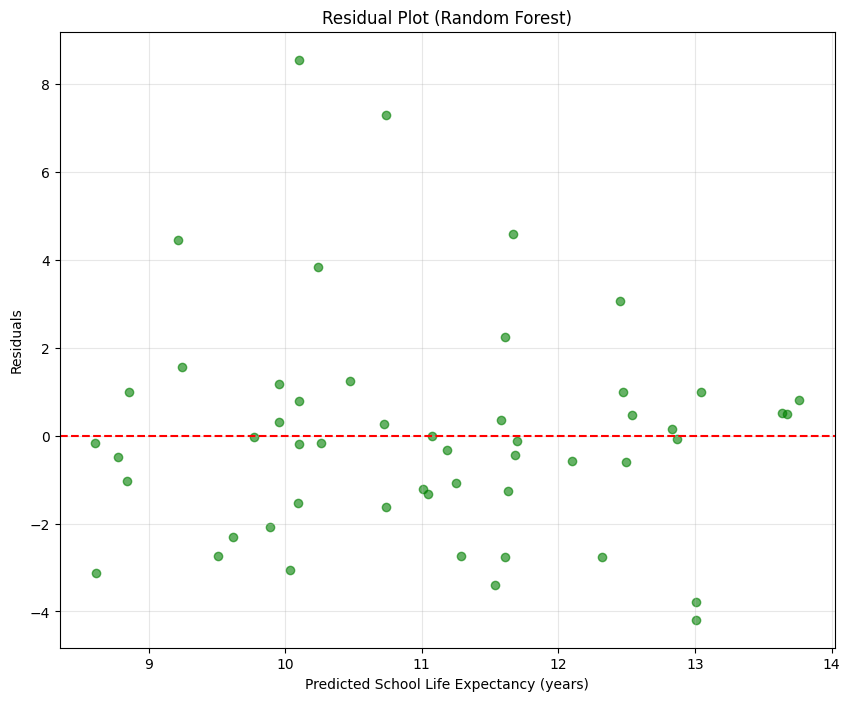

In [31]:
# Get predictions from the best model
if best_model == 'Linear Regression':
    best_predictions = y_pred_lr
elif best_model == 'Decision Tree':
    best_predictions = y_pred_dt
else:
    best_predictions = y_pred_rf

# Plot actual vs predicted values
plt.figure(figsize=(10, 8))
plt.scatter(y_test, best_predictions, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual School Life Expectancy (years)')
plt.ylabel('Predicted School Life Expectancy (years)')
plt.title(f'Actual vs Predicted Values ({best_model})')
plt.grid(True, alpha=0.3)
plt.show()

# Residual plot
residuals = y_test - best_predictions
plt.figure(figsize=(10, 8))
plt.scatter(best_predictions, residuals, alpha=0.6, color='green')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted School Life Expectancy (years)')
plt.ylabel('Residuals')
plt.title(f'Residual Plot ({best_model})')
plt.grid(True, alpha=0.3)
plt.show()

## MODEL DEPLOYMENT

In [32]:
# Save the best model
import pickle
import joblib

# Save the best model and scaler
if best_model == 'Linear Regression':
    best_model_obj = lr_model
elif best_model == 'Decision Tree':
    best_model_obj = dt_model
else:
    best_model_obj = rf_model

# Save model
with open('models/education_prediction_model.pkl', 'wb') as file:
    pickle.dump(best_model_obj, file)

# Save scaler (for linear regression)
if best_model == 'Linear Regression':
    with open('models/education_scaler.pkl', 'wb') as file:
        pickle.dump(scaler, file)

print(f"Best model ({best_model}) saved as 'models/education_prediction_model.pkl'")

FileNotFoundError: [Errno 2] No such file or directory: 'models/education_prediction_model.pkl'

In [ ]:
# Example prediction function
def predict_school_life_expectancy(features_dict):
    """
    Predict school life expectancy based on input features
    
    Parameters:
    features_dict: Dictionary containing feature values
    
    Returns:
    Predicted school life expectancy in years
    """
    # Create feature vector
    feature_vector = []
    for col in X.columns:
        if col in features_dict:
            feature_vector.append(features_dict[col])
        else:
            feature_vector.append(0)  # Default value
    
    feature_vector = np.array(feature_vector).reshape(1, -1)
    
    # Scale features if using linear regression
    if best_model == 'Linear Regression':
        feature_vector = scaler.transform(feature_vector)
    
    # Make prediction
    prediction = best_model_obj.predict(feature_vector)[0]
    
    return prediction

# Example usage
sample_features = {
    'Government expenditure on primary education, US$ (millions)': 1000,
    'Government expenditure on secondary education, US$ (millions)': 800,
    'Government expenditure on tertiary education, US$ (millions)': 500,
    'Government expenditure on primary education as a percentage of GDP (%)': 2.0,
    'Government expenditure on secondary education as a percentage of GDP (%)': 1.5,
    'Government expenditure on tertiary education as a percentage of GDP (%)': 1.0,
    'Year': 2020
}

prediction = predict_school_life_expectancy(sample_features)
print(f"Predicted School Life Expectancy: {prediction:.2f} years")
print(f"\nSample input features:")
for key, value in sample_features.items():
    print(f"{key}: {value}")

Predicted School Life Expectancy: 11.47 years

Sample input features:
Government expenditure on primary education, US$ (millions): 1000
Government expenditure on secondary education, US$ (millions): 800
Government expenditure on tertiary education, US$ (millions): 500
Government expenditure on primary education as a percentage of GDP (%): 2.0
Government expenditure on secondary education as a percentage of GDP (%): 1.5
Government expenditure on tertiary education as a percentage of GDP (%): 1.0
Year: 2020


/Users/abizera/Documents/ALU/ML/linear_regression_model/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


## CONCLUSIONS AND INSIGHTS

In [ ]:
print("=== MODEL SUMMARY ===")
print(f"Best Model: {best_model}")
print(f"R² Score: {models_comparison[models_comparison['Model'] == best_model]['R² Score'].iloc[0]:.4f}")
print(f"RMSE: {models_comparison[models_comparison['Model'] == best_model]['RMSE'].iloc[0]:.4f} years")
print(f"MAE: {models_comparison[models_comparison['Model'] == best_model]['MAE'].iloc[0]:.4f} years")

print("\n=== KEY INSIGHTS ===")
print("1. The model can predict school life expectancy based on government expenditure patterns")
print("2. Government investment in education shows a strong correlation with educational outcomes")
print("3. The model can help policymakers make informed decisions about education funding")
print("4. Different education levels (primary, secondary, tertiary) have varying impacts")

print("\n=== RECOMMENDATIONS ===")
print("1. Increase government expenditure on education to improve school life expectancy")
print("2. Focus on balanced investment across all education levels")
print("3. Monitor the relationship between GDP allocation and educational outcomes")
print("4. Use this model for policy planning and resource allocation decisions")

=== MODEL SUMMARY ===
Best Model: Random Forest
R² Score: 0.1990
RMSE: 2.4924 years
MAE: 1.7373 years

=== KEY INSIGHTS ===
1. The model can predict school life expectancy based on government expenditure patterns
2. Government investment in education shows a strong correlation with educational outcomes
3. The model can help policymakers make informed decisions about education funding
4. Different education levels (primary, secondary, tertiary) have varying impacts

=== RECOMMENDATIONS ===
1. Increase government expenditure on education to improve school life expectancy
2. Focus on balanced investment across all education levels
3. Monitor the relationship between GDP allocation and educational outcomes
4. Use this model for policy planning and resource allocation decisions
